In [20]:
import numpy as np

gamma = 1

xmin = 0
xmax = 10
nx = 500

dx = (xmax - xmin)/nx
x_vec = np.linspace(xmin, xmax, nx)

tmin = 0
tmax = 10
nt = 1000

dt = (tmax - tmin)/nt
t_vec = np.linspace(tmin, tmax, nt)

In [21]:
#initializing y positions
y_pos = np.exp(-(x_vec - 5)**2)
y_vel = np.zeros(nx)
y_acc = np.zeros(nx)

y_pos_mat = np.zeros((nt, nx))

In [24]:
for t_idx in range(0,np.size(t_vec)):
    y_acc[0], y_acc[nx - 1] = 0, 0
    for x_idx in range(1, nx - 1):
        y_acc[x_idx] = gamma / dx**2 * (y_pos[x_idx + 1] + \
                       y_pos[x_idx - 1] - 2 * y_pos[x_idx])
    y_pos = y_pos + y_vel * dt
    y_vel = y_vel + y_acc * dt
    y_pos_mat[t_idx][:] = y_pos
print("done")
print(y_pos_mat[0][:])

done
[  1.38879439e-011  -4.92101725e+133   9.80776661e+133  -1.46250025e+134
   1.93356164e+134  -2.38999310e+134   2.82752536e+134  -3.24157518e+134
   3.62727006e+134  -3.97951271e+134   4.29308564e+134  -4.56279374e+134
   4.78364006e+134  -4.95102774e+134   5.06097855e+134  -5.11035654e+134
   5.09708427e+134  -5.02033786e+134   4.88070747e+134  -4.68031043e+134
   4.42284607e+134  -4.11358386e+134   3.75927961e+134  -3.36801871e+134
   2.94898922e+134  -2.51219259e+134   2.06810361e+134  -1.62729517e+134
   1.20004635e+134  -7.95954235e+133   4.23570707e+133  -9.00842910e+132
  -1.98934515e+133   4.39709836e+133  -6.30348806e+133   7.70837033e+133
  -8.62942313e+133   9.10033571e+133  -9.16827395e+133   8.89079055e+133
  -8.33238106e+133   7.56090507e+133  -6.64409256e+133   5.64634074e+133
  -4.62597714e+133   3.63312283e+133  -2.70823988e+133   1.88139374e+133
  -1.17220823e+133   5.90443566e+132  -1.37089269e+132  -1.94162983e+132
   4.15215116e+132  -5.41775914e+132   5.91628

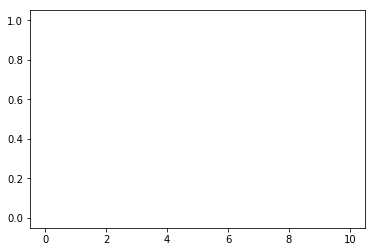

In [23]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot(x_vec, y_pos_mat[0][:])

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * nx)
    return(line,)


def animate(i):
    line.set_ydata(y_pos_mat[i][:])  # update the data.
    return(line,)


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

plt.show()